## Classification of Benign and Malignant Breast Cancer Mammogram Scans using PHCA

In [1]:
# packages
import numpy as np
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
import sys
drive.mount('/content/drive', force_remount=True)
folder_path = '/content/drive/MyDrive/kalej/Special Problem/Jetomo, Cristian B. /Breast Cancer/'
sys.path.append(folder_path)

Mounted at /content/drive


### Extracting Pixels from Breast Cancer Images

#### 1. Extracting path of images

In [3]:
# zip file of file paths to dictionary
import zipfile

def zip2array_filenames(zipPath: str, fileExtension: str):
    """
    Converts a zipped filenames into a dictionary.
    Removes the path of the folder where the filenames are saved.

    Parameter
    -------
    zipPath: path of zip file
    fileExtension: extension of the files to extract

    Return
    -------
    fileNames: array of filenames (str)
    """

    fileFolderNames = []
    with zipfile.ZipFile(zipPath, 'r') as zip:
        for fileInfo in zip.infolist():
            fileFolderNames.append(fileInfo.filename)

    fileNames = [f for f in fileFolderNames if f.endswith(fileExtension)]
    return fileNames

In [4]:
breastCancer = {'target_names': ['benign', 'malignant'], 'image_dim': (224, 224, 3)}
classes = breastCancer['target_names']
zipPaths = ['BreastCancer_Benign.zip', 'BreastCancer_Malignant.zip']

for idx,clss in enumerate(classes):
    breastCancer[clss+'Paths'] = zip2array_filenames(folder_path+zipPaths[idx], 'png')

numBenign, numMalignant = len(breastCancer['benignPaths']), len(breastCancer['malignantPaths'])
print(f'No. of Benign Images: {numBenign} \n No. of Malignant Images: {numMalignant}')

No. of Benign Images: 2520 
 No. of Malignant Images: 5112


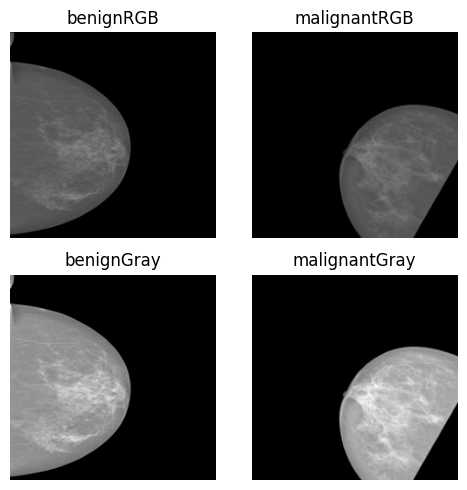

In [5]:
# sample presentation of images

benignpath, malignantpath = folder_path+breastCancer['benignPaths'][2], folder_path+breastCancer['malignantPaths'][2]
images = cv2.imread(benignpath), cv2.imread(malignantpath)
classes = breastCancer['target_names']
imgType = ['RGB', 'Gray']

fig, axs = plt.subplots(2,2, figsize=(5,5))
axs = axs.flatten()
axs[0].imshow(images[0])
axs[0].set_title(classes[0]+imgType[0])
axs[1].imshow(images[1])
axs[1].set_title(classes[1]+imgType[0])

axs[2].imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY), cmap='gray')
axs[2].set_title(classes[0]+imgType[1])
axs[3].imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2GRAY), cmap='gray')
axs[3].set_title(classes[1]+imgType[1])

for a in axs:
    a.set_axis_off()
fig.tight_layout()

#### 2. Extracting Pixels from Image

In [6]:
import cv2

def extractPixels(imgPath: str, grayscaled=True, flattened:bool=True):
    """
    Extracts flattened pixels of grayscaled image and
    original dimensions of image.

    Parameter
    --------
    imgPath: path of image

    Returns
    --------
    image: flattened image pixels
    dimensions: original height and width of image
    """
    # importing image file
    image = cv2.imread(imgPath)
    if grayscaled:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    dimensions = image.shape
    if flattened:
      return image.flatten()
    else:
      image

#### 3. Extract All Pixels

In [ ]:
for c in classes:
    breastCancer[c+'Pixels'] = [extractPixels(folder_path+path, grayscaled=False) for path in breastCancer[c+'Paths']]

In [ ]:
len(breastCancer['benignPaths']), len(breastCancer['benignPixels'])

(2520, 2520)

In [ ]:
len(breastCancer['malignantPaths']), len(breastCancer['malignantPixels'])

(5112, 5112)

#### 4. Merging Data

In [ ]:
breastCancer['data'], breastCancer['target'] = [], []
classes = breastCancer['target_names']

for idx, clss in enumerate(classes):
    newData = [data for data in breastCancer[clss+'Pixels']]
    newTarget = [idx for data in breastCancer[clss+'Pixels']]

    breastCancer['data'].extend(newData)
    breastCancer['target'].extend(newTarget)

In [ ]:
breastCancer.keys()

dict_keys(['data', 'target', 'target_names', 'benignPixels', 'malignantPixels', 'benignPaths', 'malignantPaths', 'image_dim'])

#### Saving Dictionary to npy File

In [ ]:
# saving breastCancer dictionary into npy file (grayscale)
np.save('breastCancer_dataset.npy', breastCancer)

In [ ]:
# saving breastCancer dictionary into npy file (RGB)
np.save(f'{folder_path}breastCancer_dataset_RGB.npy', breastCancer)

#### Exporting Pixels to CSV Files

In [ ]:
import pandas as pd

def list2CSV(pixelList, clss: str):
    df = pd.DataFrame(pixelList)
    df.to_csv(clss+'_pixels.csv', index=False, header=False)

In [ ]:
# saving in one go
for clss in classes:
    list2CSV(breastCancer[clss+'Pixels'], clss)

In [ ]:
list2CSV(malignantPixels, 'malignant')

In [ ]:
pd.read_csv('benign_pixels.csv', header=None)

,0,1,2,3,4,5,6,7,8,9,...,50166,50167,50168,50169,50170,50171,50172,50173,50174,50175
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,78,75,72,72,41,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
2,56,52,48,48,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Classification of Pixel Dataset using PHCA

In [7]:
# parameters
folds = 1
classes = 2
pca = True
HOG = True
data_name = f'BreastCancer_MalignantBenign \n hog={HOG}_pca={pca}'

classificationMeasurements = ['precision', 'recall', 'f1-score', 'specificity', 'support', 'accuracy']

##### Modules

###### PHCA

In [8]:
!pip install ripser

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 834.5/834.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 3.4 MB/s eta 0:00:00
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18103 sha256=0b293034a2b29bce02044e9c0fe7f2805e25e3c28f8ecffef643aac501c62d50
  Stored in directory: /root/.cache/pip/wheels/ef/0f/3b/0f931844eecc34addd90e72d54cd39c08b7066c5f25c00b9a4
Successfully built hopcroftkarp


In [9]:
# PHCA Module
import ripser
import copy
import math

class PersistentHomologyClassifier:
    def __init__(self, dim=0):
        self.dim=dim

    def fit(self, x, y):
        self.byClass_data = byClassData(x, y)
        self.persistentDiagram =  getPersistentDiagram(self.byClass_data, self.dim)

    def predict(self, x_new):
        self.byClass_data_plus = copy.deepcopy(self.byClass_data)
        self.persistentDiagram_plus={}
        for clss in self.byClass_data.keys():
            self.byClass_data_plus[clss].append(x_new)
            self.persistentDiagram_plus[clss]=ripser.ripser(np.array(self.byClass_data_plus[clss]),maxdim=self.dim)['dgms']
        classPredicted=classSelector(self.persistentDiagram, self.persistentDiagram_plus, self.dim)
        return classPredicted


def byClassData(x_data,y_data):
    byClass_data={}
    for clss in set(y_data):
        byClass_data[clss]=[]
    for i in range(len(x_data)):
        byClass_data[y_data[i]].append(x_data[i])
    return byClass_data

def getPersistentDiagram(data,dim):
    dataPH={}
    dataClass=data.keys()
    for dClass in dataClass:
        dataPH[dClass]=ripser.ripser(np.array(data[dClass]),maxdim=dim)['dgms']
    return dataPH

def classSelector(PHCtrain, PHCpredict, dim):
    byClass_score={}
    n_train, n_predict = 0, 0
    for clss in PHCtrain.keys():
        #difference in the life span
        s2=0
        s2_train=0
        s2_predict=0

        for d in range(0,dim+1):
            for i in range(len(PHCtrain[clss][d])):
                if not math.isinf(PHCtrain[clss][d][i][1]):
                    s2_train+=PHCtrain[clss][d][i][1]-PHCtrain[clss][d][i][0]
                    n_train += 1
            for i in range(len(PHCpredict[clss][d])):
                if not math.isinf(PHCpredict[clss][d][i][1]):
                    s2_predict+=PHCpredict[clss][d][i][1]-PHCpredict[clss][d][i][0]
                    n_predict += 1
        s2=s2_predict-s2_train
        byClass_score[clss]=s2
    classPredicted = min(byClass_score, key=byClass_score.get)
    return classPredicted

###### Classification

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

def kfoldDivideData(FSLData, FSLTarget, data_per_class, folds=5):
    """ Partitions the dataset into five folds, each fold with equal number of data from the same class."""
    fivefoldData, fivefoldTarget = [[] for i in range(folds)], [[] for i in range(folds)]
    feat, lab = [], []
    fold = 0
    dpcpf = math.ceil(data_per_class/folds)
    cut = dpcpf

    for i in range(len(FSLTarget)):
        if i < cut:
            feat.append(FSLData[i]), lab.append(FSLTarget[i])
        else:
            fivefoldData[fold] += feat
            fivefoldTarget[fold] += lab

            feat, lab = [], []
            feat.append(FSLData[i]), lab.append(FSLTarget[i])
            fold += 1
            cut += dpcpf

        if fold == folds:
            fold = 0
    fivefoldData[folds-1] += feat
    fivefoldTarget[folds-1] += lab

    for f in range(folds):
        fivefoldData[f], fivefoldTarget[f] = shuffle(fivefoldData[f], fivefoldTarget[f], random_state=np.random.randint(folds))
    return fivefoldData, fivefoldTarget

def get_specificity(confusionMatrix, classes):
    label_lists = classes
    specificity = {}
    for l, label in enumerate(label_lists):
        tp, tn, fp, fn = 0, 0, 0, 0
        tp = confusionMatrix[l, l]
        fn = sum(confusionMatrix[l]) - tp
        for i in range(len(label_lists)):
            for j in range(len(label_lists)):
                if i == l or j == l:
                    continue
                else:
                    tn += confusionMatrix[i,j]
        for i in range(len(label_lists)):
            if i==l:
                continue
            else:
                fp += confusionMatrix[l][i]
        specificity[str(label)] = tn/(tn+fp)
    return specificity

def plot_metrics(predicted_labels, true_labels, measurements, title=None):
  colors = ['#013A63', '#2A6F97', '#89C2D9']
  report = classification_report(true_labels, predicted_labels, output_dict=True)
  labels = np.unique(true_labels)
  metric_values = []
  xlabels = ['precision', 'recall', 'f1-score', 'specificity', 'accuracy']
  metrics = measurements.copy()
  metrics.remove('support')
  specificity = get_specificity(confusion_matrix(true_labels, predicted_labels, labels=labels), labels)
  for metric in metrics:
    if metric == 'accuracy':
      value = [report[metric]]
    elif metric == 'specificity':
      value = [specificity[str(clss)] for clss in labels]
    else:
      value = [report[str(clss)][metric] for clss in labels]
    metric_values.extend(value)

  # plot 4 eval metrics
  b = plt.bar(np.arange(len(metric_values[:-1])), metric_values[:-1], width=0.90, color=colors[:-1])
  plt.bar_label(b, fmt='%.2f', label_type='edge')

  # plot accuracy
  b2 = plt.bar([8.5], metric_values[-1], width=1.5, color=colors[-1])
  plt.bar_label(b2, fmt='%.2f', label_type='edge')

  # plot proxy legends
  handles = [plt.Rectangle((0,0),1,1, color=colors[lab]) for lab in labels] + [plt.Rectangle((0,0),1,1, color=colors[-1])]
  plt.legend(handles, ['0', '1', 'overall'])
  plt.ylim([0, 1.3])

  plt.xticks(np.arange(0.5, 9.5, step=2), xlabels, rotation='horizontal')
  if title is not None:
    plt.title(title)

##### Data Preparation

In [11]:
# importing dataset
breastCancer = np.load(f'{folder_path}breastCancer_dataset.npy', allow_pickle=True)
breastCancer = {
    'data': breastCancer.item().get('data'),
    'target': breastCancer.item().get('target'),
    'target_names': breastCancer.item().get('target_names'),
    'benignPixels': breastCancer.item().get('benignPixels'),
    'malignantPixels': breastCancer.item().get('malignantPixels'),
    'benignPaths': breastCancer.item().get('benignPaths'),
    'malignantPaths': breastCancer.item().get('malignantPaths'),
    'image_dim': breastCancer.item().get('image_dim')
}

classes = breastCancer['target_names']

breastCancer.keys(), np.array(breastCancer['data']).shape, classes

(dict_keys(['data', 'target', 'target_names', 'benignPixels', 'malignantPixels', 'benignPaths', 'malignantPaths', 'image_dim']),
 (7632, 50176),
 ['benign', 'malignant'])

In [12]:
# parameters and reshaping data
HEIGHT, WIDTH = 224, 224
X, y = np.array(breastCancer['data']), np.array(breastCancer['target'])
X = X.reshape(-1, HEIGHT, WIDTH)
y = y[:,0]  # run only if not RGB
X.shape, y.shape

((7632, 224, 224), (7632,))

In [13]:
# splitting training and testing
from sklearn.model_selection import train_test_split

train_size, test_size = 4800, 1200
indices = np.arange(len(y))
X_train, X_test, y_train, y_test, train_ind, test_ind = train_test_split(X, y, indices, train_size=train_size, test_size=test_size, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (4800, 224, 224), y_train shape: (4800,)
X_test shape: (1200, 224, 224), y_test shape: (1200,)


In [ ]:
# HOG
from skimage.feature import hog

if HOG is True:
  X_train = np.array([hog(img, orientations=9, pixels_per_cell=(8,8), cells_per_block=(3,3)).flatten() for img in X_train])
  X_test = np.array([hog(img, orientations=9, pixels_per_cell=(8,8), cells_per_block=(3,3)).flatten() for img in X_test])
  print(f'Dimension of each instance after HOG: {X_train[0].shape[0]}')

In [ ]:
# PCA
from sklearn.decomposition import PCA
if pca is True:
  pca_model = PCA(0.95).fit(X_train)  # runtime usually tends to crash for large-sized X_train
  X_train, X_test = pca_model.transform(X_train), pca_model.transform(X_test)
  print(f'Dimension of training data after dimension reduction: {X_train.shape}')

In [ ]:
# scaling values
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (4800, 54756), y_train shape: (4800,)
X_test shape: (1200, 54756), y_test shape: (1200,)


In [ ]:
np.save(f'{folder_path}HOGPCA_train_data_{X_train.shape[0]}.npy', X_train)
np.save(f'{folder_path}HOGPCA_test_data_{X_test.shape[0]}.npy', X_test)

In [15]:
X_train = np.load(f'{folder_path}HOGPCA_train_data_{X_train.shape[0]}.npy')
X_test = np.load(f'{folder_path}HOGPCA_test_data_{X_test.shape[0]}.npy')

##### Classification Proper

In [ ]:
from tqdm import tqdm

print('Starting Validation -------------')
print("\nThe PHCA model is learning from the data...")

method_labels = {'true_labels': [], 'phca': []}
# Persistent Homology Classifier
PHCModel = PersistentHomologyClassifier()
PHCModel.fit(X_train, y_train)

print("Model finished learning.")
print()
print("The model is now predicting new data.")

method_labels['true_labels'].extend(y_test)
for i, x in enumerate(tqdm(X_test)):
    method_labels['phca'].append(PHCModel.predict(x))
print("\n Models are finished predicting.")

In [ ]:
ntrain, ntest = len(X_train), len(X_test)
np.save(f'{folder_path}PHCA_predicted_labels{ntrain}:{ntest}.npy', method_labels['phca'])

##### Classification Report

In [ ]:
method_labels = {'true_labels': y_test, 'phca': []}
method_labels['phca'] = np.load(f'{folder_path}PHCA_predicted_labels{len(X_train)}:{len(X_test)}.npy')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(method_labels['true_labels'], method_labels['phca']))

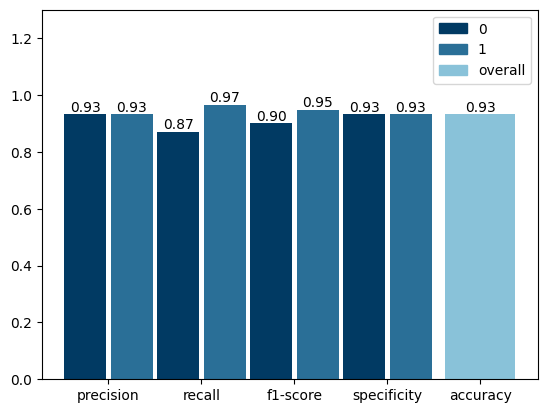

In [ ]:
ntrain, ntest = len(X_train), len(X_test)
plot_metrics(method_labels['phca'], method_labels['true_labels'], classificationMeasurements)

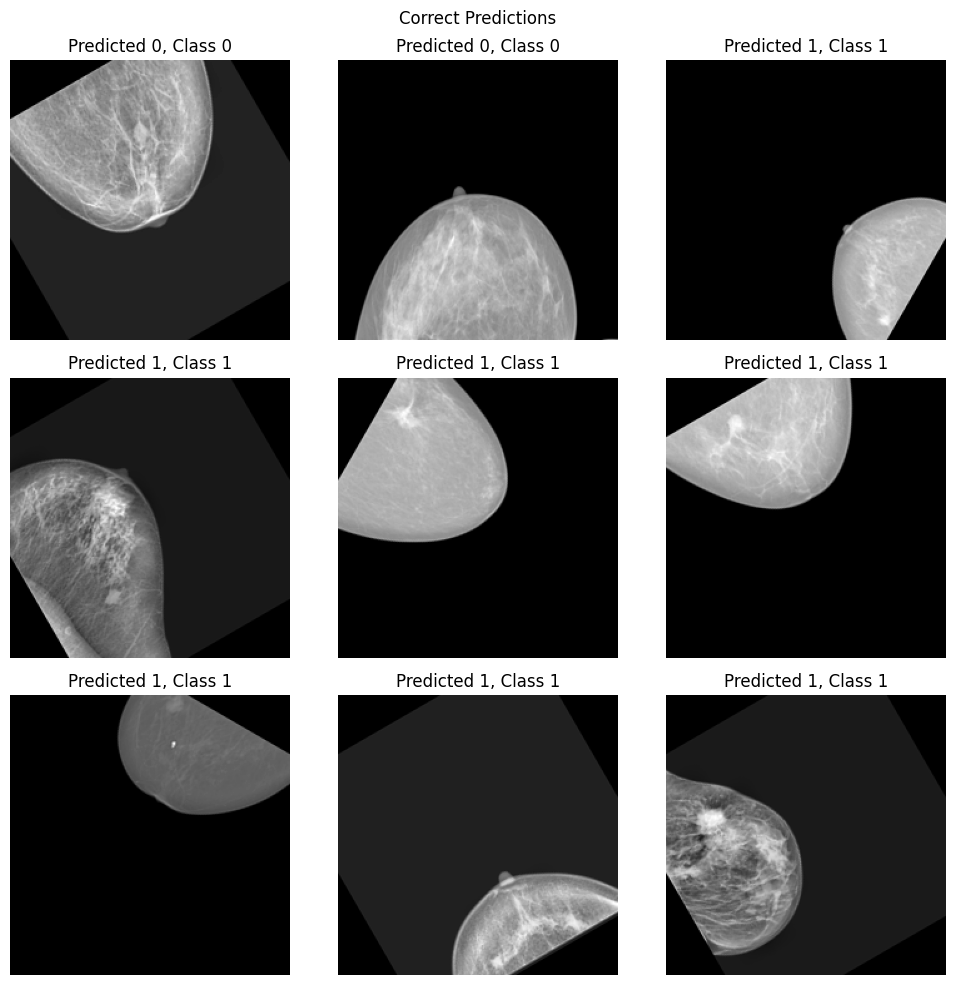

In [ ]:
# plotting incorrect and correct predictions
y_pred = method_labels['phca']
img_paths = breastCancer['benignPaths'] + breastCancer['malignantPaths']
correct_inds = test_ind[np.nonzero(y_pred == y_test)[0]]
incorrect_inds = test_ind[np.nonzero(y_pred != y_test)[0]]

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i, correct in enumerate(correct_inds[:9]):
  plt.subplot(3,3, i+1)
  pred_ind = np.nonzero(y_pred == y_test)[0][i]
  img = cv2.imread(folder_path+img_paths[correct])
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cmap='gray')
  plt.title(f'Predicted {y_pred[pred_ind]}, Class {y_test[pred_ind]}')
  plt.axis('off')
plt.suptitle(f'Correct Predictions')
plt.tight_layout()
plt.show()

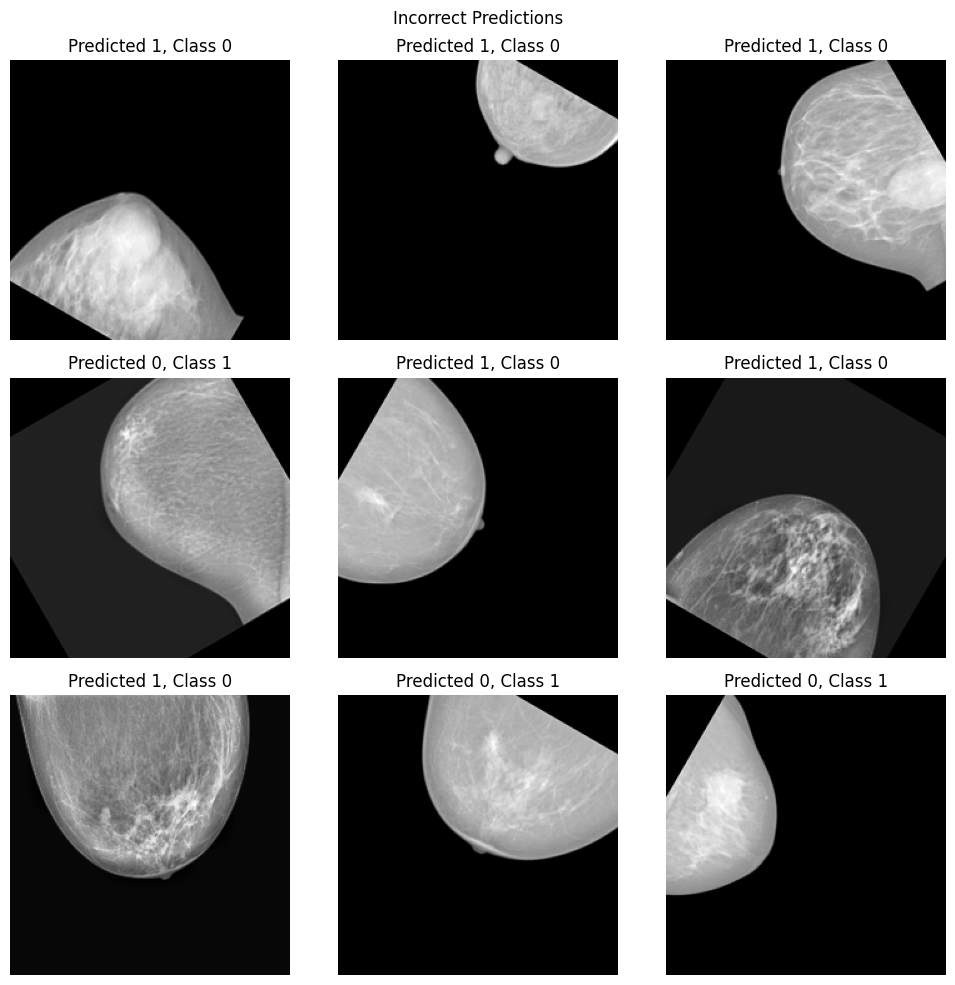

In [ ]:
plt.figure(figsize=(10,10))
for i, incorrect in enumerate(incorrect_inds[:9]):
  plt.subplot(3,3, i+1)
  pred_ind = np.nonzero(y_pred != y_test)[0][i]
  img = cv2.imread(folder_path+img_paths[incorrect])
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cmap='gray')
  plt.title(f'Predicted {y_pred[pred_ind]}, Class {y_test[pred_ind]}')
  plt.axis('off')
plt.suptitle(f'Incorrect Predictions')
plt.tight_layout()
plt.show()